# Optimizers 

So what are `Optimizers`

**What** - Optimizer is a technique to set the `weights` and `biases` of a particular model such that they produce minimum `Loss` Possible.

The bestest way (in my opinion) to get started is to fist understand what the hell is this `Regression`

**What** - `Regression` is just like the lost brother of `classification`. In `classification` we have `discrete` or `particular values`, that we want to `classify`, In `regression` we have `continuous values`, that we want to `predict`

| Classification |Regression |
| --- | --- |
|  We have discrete values| We have continuous values |
|Usually we know these values in depth | We usually don't know these values in depth|
|These are comparatively less in number| These are comparatively more in number |

# 1 | What other things we will learn here
* Slope of Function
* Baisc Diffrentiation
* Intercept 

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
from IPython.display import IFrame

Lets assume we have data like this

In [4]:
features = np.array([x for x in range(0 , 200 , 1)])
features

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [5]:
target = np.array([x for x in range(0 , 400 , 2)])
target

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258,
       260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284,
       286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310,
       312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336,
       338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 36

Lets assume there is a connection between the `target` , and `features`. By human instacne we know that every element in `target` is just a double of the corresponding element in `features`, or $target  = 2XFeatures$. 

Lets assume we change the target a little bit...

In [6]:
target = np.array([x + 1 for x in range(0 , 400 , 2)])
target

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207,
       209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233,
       235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259,
       261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285,
       287, 289, 291, 293, 295, 297, 299, 301, 303, 305, 307, 309, 311,
       313, 315, 317, 319, 321, 323, 325, 327, 329, 331, 333, 335, 337,
       339, 341, 343, 345, 347, 349, 351, 353, 355, 357, 359, 36

Now what could be the trend here..., We can see the code above and with the help of that we can say. That `target` value is just the `double + 1` of the corresponding element in `features`. or $target = 2Xfeatures + 1$

Till now the problem was really easy to solve, and thats why we used the brain only, But these are just examples. As we move closer to the real world. The examples/problems get difficulat and we find it harder to find proper trends in the two `arrays`. Thats we try to teach machine, how to find trend in the data. The formula we had before $target = 2Xfeature + 1$ is subjective to only one problem or a similar problem. But this formula can be generlized by the equation of `straight line`, which is $y = mx + b$

So what does this line means ???

Lets first try to plot the data we had on a scatter plot 

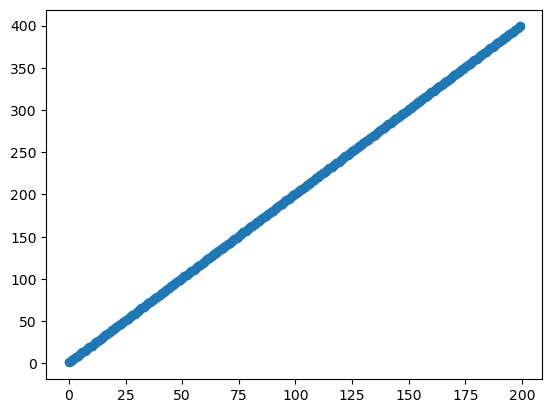

In [7]:
plt.scatter(features , target)

You can see we got a sequence of dots that resembles kind of straight line. 

Lets assume we have a line that tries to capture most of the points on this, like this

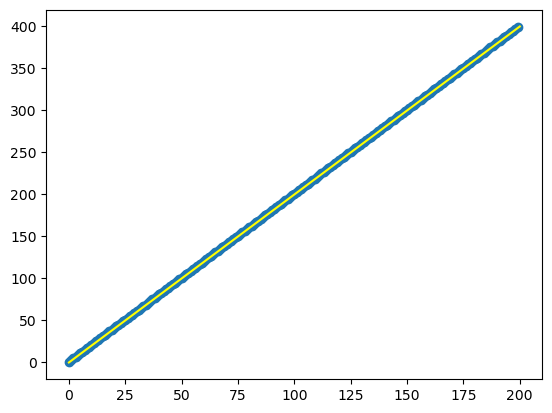

In [8]:
plt.scatter(features , target)
plt.plot([0 , 200] , [0 , 400] , "yellow")

Again by human intution we found the `best fit line`. But what if we want to generalize the things and kind of do not find the best fit line...?

First of all lets get a little bit more deep into equation $y = mx + b$

So what does these terms resembles in this eqution. 
* `m` is the slope of the line

# 1.1 | Slope of A function

Slope of a function shows how steep a function is, or the direction of a function at a given point on the curve.

Lets assume we have this curve $y = 4x^2$ the slope of this curve will be $y = 8x$

In [9]:
IFrame("https://www.desmos.com/calculator/zluqu5vyuh" , 400 , 400)

So how do we calculate the `slope` of a line???

Lets assume we have a function $y = f(x)$,. To find the slope of a function, we simply diffrenctiate the function, thus, the slope of this line will be $y^` = f^`(x)$

# 1.2 | Diffrentiation

Diffrentaition can be explained as getting a small value of a function.

lets assume we have a function `y = sin(x)`

A small strip at that function will demonstrate taking a derivative of that function `sin(x)`

Taking about the function we had taken before that is $y = 4x^2$

Taking its derivative we will get $$y = 8x$$ ($x{n^`} = nx^{n-1}$)

So the slope of $y = 4x^2$ can be represnted as 

In [10]:
IFrame("https://www.desmos.com/calculator/hrguwktg9q" , 400 , 400)

**If you want to know more aboud diffrentiation, here is [3Blue1Brown](https://www.youtube.com/@3blue1brown/featured) => [Essence Of Calculas](https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr)**

So now you have a basic idea of `slope`

# 1.3 | Intercept

Now what `b` represents in the data. Usually it is called the `intercept`. Consider this graph of the equation $y = x$ or $y = 1x + b$ 

In [11]:
IFrame("https://www.desmos.com/calculator/gai0veg5fh" , 400 , 400)

This line passes the axis at $(0 , 0)$. These coordinates are called as the `intercepts` of this line. If we make `b` or `intercept` as $1$. The line will then pass from $(1 , -1)$. Basically the `intercept` moves a line in a plane. With that being said, Lets also undertand how the `slope` changes the line. If we make `m` as $2$. The line will rotate anti-clockwise. So as we increase the value of `m` or `slope`. The line moves anti-clockwise, And so the vice-versa, If we decrease the value of `m`, The slope will move in the clockwise direction. 

In short tweeking the values of `m` and `b` or `slope` and `intercept`. We can move the line in any direction and in any way we want `as long as it resembles a straight line`. We still cannot bend the line 

So now we have any data, we just need to difine the values of `slope` and `intercpet`. And we can get the best fit line. But still the question arises how do we generalize the values of these tuning parametes. 

In simple word we can say, How can we find a relation between the data we have and these tuning parameters. So that we only need to define that relationship and then we can easily predict the values.

Lets think that the value assigned to the line is this 

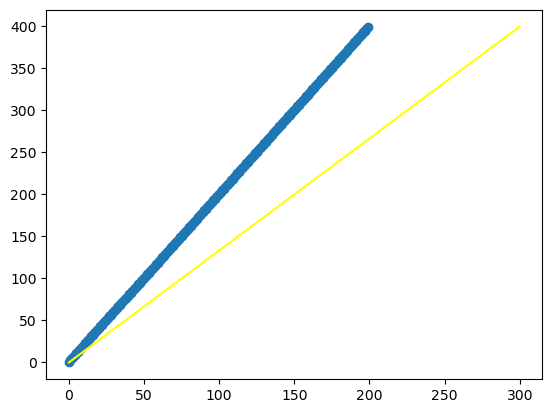

In [12]:
plt.scatter(features , target)
plt.plot([0 , 300] , [0 , 400] , "yellow")

If we test this line on the training data only, we will find that this line is not correct. It is predicting points incorrect, We know that the best fit line we drew first, will predict points wiht lowest incorrect ones. For example the line we just defined if asked the corresponding value of $200$, it will say $250$. But rather it was $400$. There was some `error`, some `loss`, or some `cost` with the `actual` and `predicted` values.

For measuring this loss, what we can do is find the difference between the `actual value` and the `predicted value`. A best fit line will give the lowest value of this difference.

The word difference here is very difficult to say, so we can give this term a new fancy name, which is `The Loss`.

One can deifne loss as $$Loss = actual - predicted$$.

We only took the example of one value. but there are a large group of values. that can show the same trait, For that we can change the formula to 

Lets denote $actual$ as $a$ and $predicted$ as $p$

$$Loss = (a_1 - p_1) + (a_2 - p_2) + (a_3 - p_3) + ... + (a_n - p_n)$$

or $$Loss = \sum\limits_{i = 1}^{n}a_i - p_i$$ or $$Loss = \sum\limits_{i = 1}^{n}(y_i - \hat y_i)$$

Whenever you see $\hat y$, think of it as the `predicted value`

Now lets assume we have data like this and a random line is drawn like this 

<img src = "https://cdn-media-1.freecodecamp.org/images/MNskFmGPKuQfMLdmpkT-X7-8w2cJXulP3683">

If you look closely, a lot of error terms will tend to cancel out each other. We can also get into a state where the line is `not the best fit`, but still gives $0$ error. With the `Loss` we defined before, we are not chossing a `best fit line`. Rather we are chossing a line that is in the `middle` of those points. One way to counter this is to add a `modulus` function like this $$Loss = \sum\limits_{i = 1}^{n}|y - \hat y|$$

But what is a modulus function. The function is nothing but converts, any negative numbers to postive. For example 
$|-1| = 1$

In [13]:
IFrame("https://www.desmos.com/calculator/kamxotjra2" , 400 , 400)

But there is a problem with this function. A `modulus` is not diffrentiable. You might be thinking that why are we even seeing that part, like we we care for that. Why would you even diffrentiate a loss function. 

We actually diffrentiate loss function in further steps, thats why we will not use the modulus function. 

Another way of doing so is to, square the loss function like this $Loss = (y - \hat y)^2$

Its cool, its good and we can even diffrentiate this...

Now we have a basic idea that we need to compute `m` and `b` for the lowest loss values. Now we should come to know how we can do this 

What if we somehow interelate the `losses` and `m and b`. 

Lets assume we intialize the parameters randomly, like this 

# 2 | SGD

In [14]:
weights = np.random.randn(1)
weights

array([0.51161234])

In [15]:
biases = np.random.randn(1)
biases

array([-0.38966991])

So the predicitions will be 

In [16]:
pred = weights * 30 + biases
pred

array([14.9587002])

And its way far than what we had expected. 

In [17]:
loss = (pred - 60)
loss

array([-45.0412998])

Our main motive is to reduce this loss as much as possible,. 

What if we subtract a small subset of the derivative of this loss from the parameters like this. The derivative of the loss will show us the steepness of the curve, and thus doing so might get us to the valeus of minimum loss. So how do we find the derivative of this function $Loss = (y - \hat y)^2$. What we know is $\hat y = mx + b$. COmputing this value in we get $$Loss = (y - mx - b)^2$$, Now we can diffrentiate the function

## Diffrentiating wrt `b`
$$\frac {dLoss}{db}= \frac {d}{db}(y - mx - b)^2$$
$$= 2(y - mx - b)(-1)$$

## Diffrentiating wrt `m`
$$\frac {dLoss}{dm} = \frac {d}{dm}(y - mx - b)^2$$
$$= 2(y - mx - b)(-x)$$

In [18]:
weights -= (-2* (60 - weights*30 - biases)) * 0.001
biases -= (2 * 30 * (60 - weights * 30 - biases)) * 0.01

And if we then try to predict the values 

In [19]:
print(weights)
print(biases)
loss = (60 - (weights * 30 + biases))
loss

[0.60169494]
[-25.792963]


array([67.7421149])

Our losses have been decreased, so lets do it again 

In [20]:
weights -= -2 * loss * 0.01
biases -= -2 * loss * 0.01
print(weights)
print(biases)
loss = (60 - (weights * 30 + biases))
loss

[1.95653723]
[-24.4381207]


array([25.74200366])

So now we know if we do this iteratively, we will minimise the loss, and iteratively we will reach the optimal values of `weights` or `m` and `biases` or `m`

Lets say we have runn this again and again for around 100 times 

In [21]:
for _ in range(100):
    weights -= -2 * loss * 0.01
    biases -= -2 * loss * 0.01
    loss = (60 - (weights * 30 + biases))

Lets now see the weights and biases 

In [22]:
weights , biases

(array([2.78692445]), array([-23.60773348]))

Though we have biases as high, but we have almost achived value of `weights`

Lets do this all again, and now we will also try to plot a graph

In [23]:
weights = abs(np.random.randn(1))
biases = abs(np.random.randn(1))
losses = []
for _ in range(100):
    weights -= -2 * loss * 0.01
    biases -= -2 * loss * 0.01
    loss = (60 - (weights * 30 + biases))
    losses.append(loss)

<AxesSubplot:>

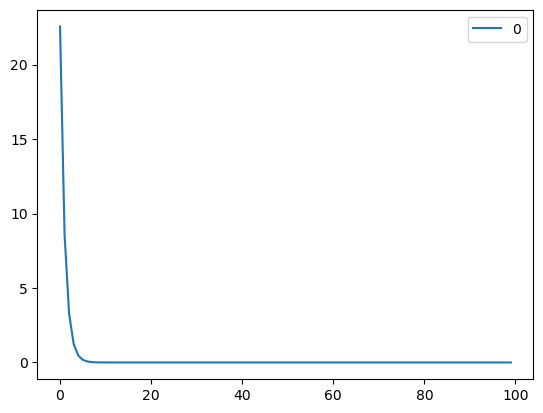

In [24]:
sns.lineplot(np.array(losses))

As we can see we have greatly decreased our losses 

# 2.1 | Functionalities
We have made out our **SGD**, now we need to add some functionalities to it. We can get funcitonalites form **[Tensorflow](https://www.tensorflow.org/)=>[Keras](https://keras.io/about/)=>[Optimizers](https://keras.io/api/optimizers/)=>[Experimental](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental)=>[SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/SGD)**. The type of optimization tensorflow uses is a little bit different. It initializes and keeps the computation in the optimizer function and do the `fit` and `predict` on another function that uses this function. This is done so as to make a generalized optimizer for both `Linear` and `Sequential` models. But we will try to use the vanilla gradient descent and combine the initialization and the `fit` methods.

* ✅List Of columns
* ✅`learning_rate` - A Tensor, floating point value, or a schedule that is a **[tf.keras.optimizers.schedules.LearningRateSchedule](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/LearningRateSchedule)**, or a callable that takes no arguments and returns the actual value to use. The learning rate. Defaults to $0.001$.
* ✅`momentum` - float hyperparameter >= 0 that accelerates gradient descent in the relevant direction and dampens oscillations. Defaults to 0, $i.e.$, vanilla gradient descent.
* ✅`weight_decay : Float, defaults to None` - If set, weight decay is applied.
* ✅`nesterov : boolean` - Whether to apply Nesterov momentum. Defaults to False.
* ✅`weight_decay : Float, defaults to None` - If set, weight decay is applied.
* ✅`clipnorm : Float` - If set, the gradient of each weight is individually clipped so that its norm is no higher than this value.
* ✅`clipvalue : Float` - If set, the gradient of each weight is clipped to be no higher than this value.
* ✅`use_ema : Boolean, defaults to False` - If True, exponential moving average (EMA) is applied. EMA consists of computing an exponential moving average of the weights of the model (as the weight values change after each training batch), and periodically overwriting the weights with their moving average.
* ✅`ema_momentum : Float, defaults to 0.99` - Only used if use_ema=True. This is the momentum to use when computing the EMA of the model's weights: `new_average = ema_momentum * old_average + (1 - ema_momentum) * current_variable_value`.

# 2.1.1 | List Of Columns 

This function will only work if there are only $2$ columns, one `feature` and the other one `target`. What if the user gives out a list of columns. For this we nee dto take two different arguemnts form the user and work on them differently

In [25]:
def SGD(X , y):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    losses = []

    for _ in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        weights -= -2 * loss * 0.01
        biases -= -2 * loss * 0.01

    return weights , biases , losses

# 2.1.2 | Learning Rate

You remeber we were taking a small part of the loss, not the whole loss. The parameter that defines how much loss we are taking is called the **Learning Rate** 

You might be thinking that it is not that important, but it is really important concept, a higher learning rate has a high chance that you will never converge to the model, a low very low learning rate means that you will take a very long time to converge for the model 

Here is a very good image that explains the importance of the learning rate 

<img src = "https://www.researchgate.net/profile/Hajar-Feizi/publication/341609757/figure/fig2/AS:894745802977280@1590335431623/Changes-in-the-loss-function-vs-the-epoch-by-the-learning-rate-40.png">

It will be really easy for us to apply this functinality, we just need to change some varaibales

In [26]:
def SGD(X , y , learning_rate = 0.01):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    losses = []

    for _ in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        weights -= -2 * loss * learning_rate
        biases -= -2 * loss * learning_rate

    return weights , biases , losses

# 2.1.3 | Momentum 

The probelem with gradient descent is this 

<img src = "https://winder.ai/blog/2017/img/gradient_descent.svg">

Notice that before we were taking larger steps and as we reached the minimum value, are step size shortened. It is kind of a blessing as well as sometimes a curse for us. The problem is while getting very near to the minimum value, the step size gets so small. that it merely becomes $0$. not $0$ (that means we have reahed the minimum value). To cunter this we introduce momentum to the formula 

Lets assume you are going to a place that you dont know. Like you dont know where it exists. So what you do is you ask people in the way that where is the place, and they show you the directions. Lets assume the directions are only right $(->)$ and left $(<-)$. So you ask $1^{st}$ person and he says to go to the right $(->)$, then you ask the $2^{nd}$ person and he also asks you to go right $(->)$, so you gain a confidence that you are going right. so you increase your speed. you might skip the $3^{rd}$ person and directly ask the $4^{th}$. 

Lets assume the same situation from start. So you ask the $1^{st}$ person and he says to go to the right $(->)$ and then you ask the $2^{nd}$ person and he says to go left. But your inner instinct says that you are in the correct direction, but due to the influence of the $2^{nd}$ person, you will go slowly.

So you increase and decrease you speed on the basis of the previously gained knowledge. This is the same concept `momentum`, tries to implement. 

One way of doing so is to add the commulative sum of all the gradients we achived previously like this 

$$w_{n+1} = w_n - \frac {dLoss}{dw} \alpha + (\sum\limits_{i = 1}^{n}w_i)$$

$$b_{n+1} = b_n - \frac {dLoss}{db} \alpha + (\sum\limits_{i = 1}^{n}b_i)$$

But there are majorly $2$ probelems with this formula $:-$
* Rather than fastening the gradients a little bit, it will fasten them exponentially.
* This formula values every gradient equal, 

To rectify this probelm we take the weighted average sum of all the gradients. or we actually multiply the sum with some constant. we change the formula a little bit 

$$w_{n+1} = w_n - (\beta w_m + \alpha(1 - \beta) \frac {dLoss}{dw})$$

$$b_{n+1} = b_n - (\beta b_m + \alpha(1 - \beta) \frac {dLoss}{db})$$


In [27]:
def SGD(X , y , learning_rate = 0.01 , momentum = 0):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    m_weights = 0
    m_biases = 0

    losses = []

    for _ in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum(pred - y)
        losses.append(loss)

        m_weights = momentum * m_weights + (1 - momentum) * (-2 * loss)
        m_biases = momentum * m_biases + (1 - momentum) * (-2 * loss)
        
        weights -= m_weights[epochs + 1] * 0.01
        biases -= m_biases[epochs + 1] * 0.01

    return weights , biases , losses

# 2.1.4 | Nestrov
While SGD with momentum can be effective at overcoming oscillations in the cost function, NAG has been shown to converge faster and more reliably in many cases, and thats why we will give the functionality of this function to 
$$w^n = w^{n-1} - \beta w_v^{n-1} + (1-\beta)(w^{n-1} - \beta w_v^{n-1})$$
$$b^n = b^{n-1} - \beta b_v^{n-1} + (1-\beta)(b^{n-1} - \beta b_v^{n-1})$$

In [28]:
def SGD(X , y , learning_rate = 0.01 , momentum = 0 , nestrov = False):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))
    
    m_weights = 0
    m_biases = 0
    
    losses = []
    
    for _ in range(100):
    
        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        if nestrov :

            m_weights = (momentum * m_weights + ((1 - momentum) * (weights - momentum * m_weights))) * -2 * loss 
            m_biases = (momentum * m_biases + ((1 - momentum) * (weights - momentum * m_biases))) * -2 * loss

        else :

            m_weights = momentum * m_weights + (1 - momentum) * -2 * loss
            m_biases = momentum * m_biases + (1 - momentum) * -2 * loss

        weights -= m_weights * learning_rate
        biases -= m_biases * learning_rate

    return weights , biases , losses

# 2.1.5 | Weight Decay 
Weight decay is a powerful regularization technique that can help to prevent overfitting and improve the generalization performance of machine learning models trained with SGD optimization.
$$u = u + \gamma u$$

In [29]:
def SGD(X , y , learning_rate = 0.01 , momentum = 0 , nestrov = False , weight_decay = None):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))
    
    m_weights = 0
    m_biases = 0
    
    losses = []
    
    for _ in range(100):
    
        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        if nestrov :

            m_weights = (momentum * m_weights + (1 - momentum) * (weights - momentum * m_weights)) * -2 * loss 
            m_biases = (momentum * m_biases + (1 - momentum) * (weights - momentum * m_biases)) * -2 * loss

        else :

            m_weights = momentum * m_weights + (1 - momentum) * -2 * loss
            m_biases = momentum * m_biases + (1 - momentum) * -2 * loss

        weights -= (m_weights + weight_decay * m_weights) * learning_rate
        biases -= (m_biases + weight_decay * m_biases) * learning_rate

    return weights , biases , losses

# 2.1.6 | Clip Norm

Sometimes there is a chance that the weights go skyrocketting, which is generally considered a bad idea, parameters in the range of $(-1, 1)$ are considered to be good. Thats why sometimes we use clip-norm , that generates a upper baseline for the parameters. 

In [30]:
def SGD(X , y , learning_rate = 0.01 , momentum = 0 , nestrov = False , weight_decay = None , clip_norm = None):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))
    
    m_weights = 0
    m_biases = 0
    
    losses = []
    
    for _ in range(100):
    
        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        if nestrov :

            m_weights = (momentum * m_weights + (1 - momentum) * (weights - momentum * m_weights)) * -2 * loss 
            m_biases = (momentum * m_biases + (1 - momentum) * (weights - momentum * m_biases)) * -2 * loss

        else :

            m_weights = momentum * m_weights + (1 - momentum) * -2 * loss
            m_biases = momentum * m_biases + (1 - momentum) * -2 * loss

        if clip_norm != None:
            
            weights = np.clip(weights , weights , clip_norm)
            biases = np.clip(biases , biases , clip_norm)

        weights -= (m_weights + weight_decay * m_weights) * learning_rate
        biases -= (m_biases + weight_decay * m_biases) * learning_rate

    return weights , biases , losses

# 2.1.7 | Clip Values

Sometimes the same can go with the `gradients` and thus we also clip them. Higher gradients means that learning rate is very high and need to be lowered. This gives us $2$ tuners to control the gradient 

In [31]:
def SGD(X , y , learning_rate = 0.01 , momentum = 0 , nestrov = False , weight_decay = None , clip_norm = None):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))
    
    m_weights = 0
    m_biases = 0
    
    losses = []
    
    for _ in range(100):
    
        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        if nestrov :

            m_weights = (momentum * m_weights + (1 - momentum) * (weights - momentum * m_weights)) * -2 * loss 
            m_biases = (momentum * m_biases + (1 - momentum) * (weights - momentum * m_biases)) * -2 * loss

        else :

            m_weights = momentum * m_weights + (1 - momentum) * -2 * loss
            m_biases = momentum * m_biases + (1 - momentum) * -2 * loss

        if clip_norm != None:
            
            weights = np.clip(weights , weights , clip_norm)
            biases = np.clip(biases , biases , clip_norm)

        if clip_value != None:
            
            m_weights = np.clip(m_weights , m_weights , clip_value)
            m_biases = np.clip(m_biases , m_biases , clip_value)

        weights -= (m_weights + weight_decay * m_weights) * learning_rate
        biases -= (m_biases + weight_decay * m_biases) * learning_rate

    return weights , biases , losses

# 2.1.8 | Use EMA

Wether to use the estimated momentum average or not. The major use of this function is when `ema_momentum` is given 

In [32]:
def SGD(X , y , learning_rate = 0.01 , momentum = 0 , nestrov = False , weight_decay = None , clip_norm = None , ema = False):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))
    
    m_weights = 0
    m_biases = 0
    
    losses = []
    
    for _ in range(100):
    
        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        if nestrov :

            m_weights = (momentum * m_weights + (1 - momentum) * (weights - momentum * m_weights)) * -2 * loss 
            m_biases = (momentum * m_biases + (1 - momentum) * (weights - momentum * m_biases)) * -2 * loss

        else :

            m_weights = momentum * m_weights + (1 - momentum) * -2 * loss
            m_biases = momentum * m_biases + (1 - momentum) * -2 * loss

        if ema:pass

        if clip_norm != None:
            
            weights = np.clip(weights , weights , clip_norm)
            biases = np.clip(biases , biases , clip_norm)

        if clip_value != None:
            
            m_weights = np.clip(m_weights , m_weights , clip_value)
            m_biases = np.clip(m_biases , m_biases , clip_value)

        weights -= (m_weights + weight_decay * m_weights) * learning_rate
        biases -= (m_biases + weight_decay * m_biases) * learning_rate

    return weights , biases , losses

# 2.1.9 | EMA Momentum 

In RMSprop, the exponential moving average (EMA) of the gradient with momentum is used to improve convergence and prevent oscillations during training. The EMA of the gradient with momentum is updated at each iteration and incorporates information about the previous gradients and the current gradient to produce a more stable and consistent update direction. This helps to smooth out the noise in the gradient estimates and helps the optimizer to move more directly towards the minimum of the loss function.

In [33]:
def SGD(X , y , learning_rate = 0.01 , momentum = 0 , nestrov = False , weight_decay = None , clip_norm = None , ema = False , ema_momentum = 0.99):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))
    
    m_weights = 0
    m_biases = 0
    
    losses = []
    
    for _ in range(100):
    
        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        if nestrov :

            m_weights = (momentum * m_weights + (1 - momentum) * (weights - momentum * m_weights)) * -2 * loss 
            m_biases = (momentum * m_biases + (1 - momentum) * (weights - momentum * m_biases)) * -2 * loss

        else :

            m_weights = momentum * m_weights + (1 - momentum) * -2 * loss
            m_biases = momentum * m_biases + (1 - momentum) * -2 * loss

        if ema:
            m_weights = ema_momentum * m_weights + (1 - ema_momentum) * -2 * loss
            m_biases = ema_momentum * m_biases + (1 - ema_momentum) * -2 * loss

        if clip_norm != None:
            
            weights = np.clip(weights , weights , clip_norm)
            biases = np.clip(biases , biases , clip_norm)

        if clip_value != None:
            
            m_weights = np.clip(m_weights , m_weights , clip_value)
            m_biases = np.clip(m_biases , m_biases , clip_value)

        weights -= (m_weights + weight_decay * m_weights) * learning_rate
        biases -= (m_biases + weight_decay * m_biases) * learning_rate

    return weights , biases , losses

# 2.2 | Methods

Now to add more functionalities, we will add different methods to our alogirthm, You can acces the list of methods we are going to use from the same link before we used for `Functionalities`. 
* ✅`build` - Initialize optimizer variables. SGD optimizer has one variable momentums, only set if self.momentum is not 0.
* * ✅`weights` - Weights of the Optimizer
* * ✅`biases` - biases of the Optimizer
* ✅`compute_gradients` - Compute gradients of loss on trainable variables.
* ✅`minimize` - Minimize loss by updating `var_list`.
* ✅`update_step` - Update step given gradient and the associated model variable.

**Note** - we will stop the function from being usable at some places

# 2.2.1 | Build
This method initializes all the values in the `SGD`, you can understand this as a constructor, but not perfectly as the one. 

We will give the user a functionality, that they can intialize there own variables. At the starting the `weights` and `baises` are `None`. If the user passes their own, the function first checks that they are or correct shape and if True assigns the values, else initialize random values 

In [34]:
class SGD:
    
    def __init__(self , 
                 X , y , 
                 learning_rate = 0.01 , momentum = 0 , 
                 nestrov = False , weight_decay = 0 , 
                 clip_norm = None , clip_value = None , 
                 use_ema = False , ema_momentum = 0):
        
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.nestrov = nestrov
        self.weight_decay = weight_decay
        self.clip_norm = clip_norm
        self.clip_value = clip_value
        self.use_ema = use_ema
        self.ema_momentum = ema_momentum
    
    def build(self , weights = None , biases = None):
        
        if weights == None:
            
            self.weights = abs(np.random.randn(self.X.shape[0]))
        
        else :
            
            if weights.shape[0] == self.X.shape[1]:
                
                self.weights = weights
            
            else :
                
                self.weights = abs(np.random.randn(self.X.shape[1]))
                
                raise UserWarning("Values do not match with the `X` , intializing random Values")
                
        
        if biases == None:
            
            self.biases = abs(np.random.randn(1))
        
        else :
            
            if biases.shape[0] == 1:
                
                self.biases = biases
            
            else :
                
                self.biases = abs(np.random.randn(1))
                
                raise UserWarning("Values do not match with the `X` , intializing random Values")
    
        self.m_weights = 0
        self.m_biases = 0
    
        self.losses = []
    
        for _ in range(100):
        
            pred = np.sum((weights * self.X).T) + biases
            
            loss = np.sum((pred - self.y) ** 2)
            self.losses.append(loss)
            
            if self.nestrov :

                self.m_weights = (self.momentum * self.m_weights + (1 - self.momentum) * (self.weights - self.momentum * self.m_weights)) * -2 * loss 
                self.m_biases = (self.momentum * self.m_biases + (1 - self.momentum) * (self.biases - self.momentum * self.m_biases)) * -2 * loss

            else :

                self.m_weights = self.momentum * self.m_weights + (1 - self.momentum) * -2 * loss
                self.m_biases = self.momentum * self.m_biases + (1 - self.momentum) * -2 * loss
            
            if self.use_ema:
                
                self.m_weights = self.ema_momentum * self.m_weights + (1 - self.ema_momentum) * -2 * loss
                self.m_biases = self.ema_momentum * self.m_biases + (1 - self.ema_momentum) * -2 * loss
                
            if self.clip_norm != None:
                
                weights = np.clip(weights , weights , self.clip_norm)
                biases = np.clip(biases , biases , self.clip_norm)
            
            if self.clip_value != None:
                
                self.m_weights = np.clip(self.m_weights , self.m_weights , self.clip_value)
                self.m_biases = np.clip(self.m_biases , self.m_biases , self.clip_value)
            
            weights -= (self.m_weights + self.weight_decay * self.m_weights) * self.learning_rate
            biases -= (self.m_biases + self.weight_decay * self.m_biases) * self.learning_rate

        return weights , biases , losses

# 2.2.2 | Compute Gradients

Compuute the loss function and gradients for the losses 

In [35]:
class SGD:
    
    def __init__(self , 
                 X , y , 
                 learning_rate = 0.01 , momentum = 0 , 
                 nestrov = False , weight_decay = 0 , 
                 clip_norm = None , clip_value = None , 
                 use_ema = False , ema_momentum = 0):
        
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.nestrov = nestrov
        self.weight_decay = weight_decay
        self.clip_norm = clip_norm
        self.clip_value = clip_value
        self.use_ema = use_ema
        self.ema_momentum = ema_momentum
    
    def build(self , weights = None , biases = None):
        
        if weights == None:
            
            self.weights = abs(np.random.randn(self.X.shape[0]))
        
        else :
            
            if weights.shape[0] == self.X.shape[1]:
                
                self.weights = weights
            
            else :
                
                self.weights = abs(np.random.randn(self.X.shape[1]))
                
                raise UserWarning("Values do not match with the `X` , intializing random Values")
                
        
        if biases == None:
            
            self.biases = abs(np.random.randn(1))
        
        else :
            
            if biases.shape[0] == 1:
                
                self.biases = biases
            
            else :
                
                self.biases = abs(np.random.randn(1))
                
                raise UserWarning("Values do not match with the `X` , intializing random Values")
    
        self.m_weights = 0
        self.m_biases = 0
    
        self.losses = []

    def comput_gradients(self , weights , biases):
        
            pred = np.sum((weights * self.X).T) + biases
            
            loss = np.sum((pred - self.y) ** 2)
            
            yield loss
            
            self.losses.append(loss)
            
        #     if self.nestrov :

        #         self.m_weights = (self.momentum * self.m_weights + (1 - self.momentum) * (self.weights - self.momentum * self.m_weights)) * -2 * loss 
        #         self.m_biases = (self.momentum * self.m_biases + (1 - self.momentum) * (self.biases - self.momentum * self.m_biases)) * -2 * loss

        #     else :

        #         self.m_weights = self.momentum * self.m_weights + (1 - self.momentum) * -2 * loss
        #         self.m_biases = self.momentum * self.m_biases + (1 - self.momentum) * -2 * loss
            
        #     if self.use_ema:
                
        #         self.m_weights = self.ema_momentum * self.momentum + (1 - self.ema_momentum) * -2 * loss
        #         self.m_biases = self.ema_momentum * self.momentum + (1 - self.ema_momentum) * -2 * loss
                
        #     if self.clip_norm != None:
                
        #         weights = np.clip(weights , weights , self.clip_norm)
        #         biases = np.clip(biases , biases , self.clip_norm)
            
        #     if self.clip_value != None:
                
        #         self.m_weights = np.clip(self.m_weights , self.m_weights , self.clip_value)
        #         self.m_biases = np.clip(self.m_biases , self.m_biases , self.clip_value)
            
        #     weights -= (self.m_weights + self.weight_decay * self.m_weights) * self.learning_rate
        #     biases -= (self.m_biases + self.weight_decay * self.m_biases) * self.learning_rate

        # return weights , biases , losses

# 2.2.3 | Minimize 
Minimze the loss values

In [36]:
class SGD:
    
    def __init__(self , 
                 X , y , 
                 learning_rate = 0.01 , momentum = 0 , 
                 nestrov = False , weight_decay = 0 , 
                 clip_norm = None , clip_value = None , 
                 use_ema = False , ema_momentum = 0):
        
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.nestrov = nestrov
        self.weight_decay = weight_decay
        self.clip_norm = clip_norm
        self.clip_value = clip_value
        self.use_ema = use_ema
        self.ema_momentum = ema_momentum
    
    def build(self , weights = None , biases = None):
        
        if weights == None:
            
            self.weights = abs(np.random.randn(self.X.shape[0]))
        
        else :
            
            if weights.shape[0] == self.X.shape[1]:
                
                self.weights = weights
            
            else :
                
                self.weights = abs(np.random.randn(self.X.shape[1]))
                
                raise UserWarning("Values do not match with the `X` , intializing random Values")
                
        
        if biases == None:
            
            self.biases = abs(np.random.randn(1))
        
        else :
            
            if biases.shape[0] == 1:
                
                self.biases = biases
            
            else :
                
                self.biases = abs(np.random.randn(1))
                
                raise UserWarning("Values do not match with the `X` , intializing random Values")
    
        self.m_weights = 0
        self.m_biases = 0
    
        self.losses = []

    def comput_gradients(self , weights , biases):
        
            pred = np.sum((weights * self.X).T) + biases
            
            loss = np.sum((pred - self.y) ** 2)
            
            yield loss
            
            self.losses.append(loss)
            
        #     if self.nestrov :

        #         self.m_weights = (self.momentum * self.m_weights + (1 - self.momentum) * (self.weights - self.momentum * self.m_weights)) * -2 * loss 
        #         self.m_biases = (self.momentum * self.m_biases + (1 - self.momentum) * (self.biases - self.momentum * self.m_biases)) * -2 * loss

        #     else :

        #         self.m_weights = self.momentum * self.m_weights + (1 - self.momentum) * -2 * loss
        #         self.m_biases = self.momentum * self.m_biases + (1 - self.momentum) * -2 * loss
            
        #     if self.use_ema:
                
        #         self.m_weights = self.ema_momentum * self.momentum + (1 - self.ema_momentum) * -2 * loss
        #         self.m_biases = self.ema_momentum * self.momentum + (1 - self.ema_momentum) * -2 * loss
    def minimize(self):                
        if self.clip_norm != None:
            
            weights = np.clip(weights , weights , self.clip_norm)
            biases = np.clip(biases , biases , self.clip_norm)
        
        if self.clip_value != None:
            
            self.m_weights = np.clip(self.m_weights , self.m_weights , self.clip_value)
            self.m_biases = np.clip(self.m_biases , self.m_biases , self.clip_value)
        
        weights -= (self.m_weights + self.weight_decay * self.m_weights) * self.learning_rate
        biases -= (self.m_biases + self.weight_decay * self.m_biases) * self.learning_rate

        # return weights , biases , losses

# 2.2.4 | Update_Step

In [37]:
class SGD:
    
    def __init__(self , 
                 X , y , 
                 learning_rate = 0.01 , momentum = 0 , 
                 nestrov = False , weight_decay = 0 , 
                 clip_norm = None , clip_value = None , 
                 use_ema = False , ema_momentum = 0):
        
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.nestrov = nestrov
        self.weight_decay = weight_decay
        self.clip_norm = clip_norm
        self.clip_value = clip_value
        self.use_ema = use_ema
        self.ema_momentum = ema_momentum
    
    def build(self , weights = None , biases = None):
        
        if weights == None:
            
            self.weights = abs(np.random.randn(self.X.shape[0]))
        
        else :
            
            if weights.shape[0] == self.X.shape[1]:
                
                self.weights = weights
            
            else :
                
                self.weights = abs(np.random.randn(self.X.shape[1]))
                
                raise UserWarning("Values do not match with the `X` , intializing random Values")
                
        
        if biases == None:
            
            self.biases = abs(np.random.randn(1))
        
        else :
            
            if biases.shape[0] == 1:
                
                self.biases = biases
            
            else :
                
                self.biases = abs(np.random.randn(1))
                
                raise UserWarning("Values do not match with the `X` , intializing random Values")
    
        self.m_weights = 0
        self.m_biases = 0
    
        self.losses = []

    def comput_gradients(self , weights , biases):
        
            pred = np.sum((weights * self.X).T) + biases
            
            loss = np.sum((pred - self.y) ** 2)
            
            yield loss
            
            self.losses.append(loss)
            
    def update_step(self , loss):

        if self.nestrov :

            self.m_weights = (self.momentum * self.m_weights + (1 - self.momentum) * (self.weights - self.momentum * self.m_weights)) * -2 * loss 
            self.m_biases = (self.momentum * self.m_biases + (1 - self.momentum) * (self.biases - self.momentum * self.m_biases)) * -2 * loss

        else :

            self.m_weights = self.momentum * self.m_weights + (1 - self.momentum) * -2 * loss
            self.m_biases = self.momentum * self.m_biases + (1 - self.momentum) * -2 * loss

        if self.use_ema:

            self.m_weights = self.ema_momentum * self.m_weights + (1 - self.ema_momentum) * -2 * loss
            self.m_biases = self.ema_momentum * self.m_biases + (1 - self.ema_momentum) * -2 * loss
    def minimize(self):                
        if self.clip_norm != None:
            
            weights = np.clip(weights , weights , self.clip_norm)
            biases = np.clip(biases , biases , self.clip_norm)
        
        if self.clip_value != None:
            
            self.m_weights = np.clip(self.m_weights , self.m_weights , self.clip_value)
            self.m_biases = np.clip(self.m_biases , self.m_biases , self.clip_value)
        
        weights -= (self.m_weights + self.weight_decay * self.m_weights) * self.learning_rate
        biases -= (self.m_biases + self.weight_decay * self.m_biases) * self.learning_rate

        # return weights , biases , losses

# 2.2 | SGD Final Source Code

In [38]:
class SGD:
    
    def __init__(self , 
                 X , y , 
                 learning_rate = 0.01 , momentum = 0 , 
                 nestrov = False , weight_decay = 0 , 
                 clip_norm = None , clip_value = None , 
                 use_ema = False , ema_momentum = 0):
        
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.nestrov = nestrov
        self.weight_decay = weight_decay
        self.clip_norm = clip_norm
        self.clip_value = clip_value
        self.use_ema = use_ema
        self.ema_momentum = ema_momentum
    
    def build(self , weights = None , biases = None):
        
        if weights == None:
            
            self.weights = abs(np.random.randn(self.X.shape[0]))
        
        else :
            
            if weights.shape[0] == self.X.shape[1]:
                
                self.weights = weights
            
            else :
                
                self.weights = abs(np.random.randn(self.X.shape[1]))
                
                raise UserWarning("Values do not match with the `X` , intializing random Values")
                
        
        if biases == None:
            
            self.biases = abs(np.random.randn(1))
        
        else :
            
            if biases.shape[0] == 1:
                
                self.biases = biases
            
            else :
                
                self.biases = abs(np.random.randn(1))
                
                raise UserWarning("Values do not match with the `X` , intializing random Values")
    
        self.m_weights = 0
        self.m_biases = 0
    
        self.losses = []

    def comput_gradients(self , weights , biases):
        
            pred = np.sum((weights * self.X).T) + biases
            
            loss = np.sum((pred - self.y) ** 2)
            
            yield loss
            
            self.losses.append(loss)
    def update_step(self , loss):    
        
        if self.nestrov :

            self.m_weights = (self.momentum * self.m_weights + (1 - self.momentum) * (self.weights - self.momentum * self.m_weights)) * -2 * loss 
            self.m_biases = (self.momentum * self.m_biases + (1 - self.momentum) * (self.biases - self.momentum * self.m_biases)) * -2 * loss

        else :

            self.m_weights = self.momentum * self.m_weights + (1 - self.momentum) * -2 * loss
            self.m_biases = self.momentum * self.m_biases + (1 - self.momentum) * -2 * loss
        
        if self.use_ema:
            
            self.m_weights = self.ema_momentum * self.m_weights + (1 - self.ema_momentum) * -2 * loss
            self.m_biases = self.ema_momentum * self.m_weights + (1 - self.ema_momentum) * -2 * loss
    
    def minimize(self):                
        if self.clip_norm != None:
            
            weights = np.clip(weights , weights , self.clip_norm)
            biases = np.clip(biases , biases , self.clip_norm)
        
        if self.clip_value != None:
            
            self.m_weights = np.clip(self.m_weights , self.m_weights , self.clip_value)
            self.m_biases = np.clip(self.m_biases , self.m_biases , self.clip_value)
        
        weights -= (self.m_weights + self.weight_decay * self.m_weights) * self.learning_rate
        biases -= (self.m_biases + self.weight_decay * self.m_biases) * self.learning_rate

        return weights , biases , losses

# 3 | RMS Prop
So what is this `RMSProp` and why the hell do we need this thing 

So actually there were some problems with `SGD`. I just searched on ChatGPT and found that 
* SGD was applying a fixed learning rate in every situation, and RMSProp adapts the learning rate for the situation
* SGD is not really good with sparse inputs, and RMSProp works good with sparse inputs too
We know a little bit about `SGD` before the basic vanilla formula for SGD is 
$$p_{n} = p_{n-1} - \frac {dLoss}{dp}\alpha$$
The formula for `RMSProp` is simple as hell
****
$$v_t = \beta v_{t-1} + (1 - \beta)\frac{dLoss}{dp}$$
$$u = \frac {n}{\sqrt{v_t + e}}\frac{dLoss}{dp}$$
$$p_n = p_{n-1} - u$$
****
We know everything in this fomrula except of this one guy $e$, what is this $e$ doing here. Lets assume at some point the weight of one feature has became purely $0$. One way to think about this is as that feature doesnt contribute litrally anything to target values, then as we are dividing by `weight`  which is $0$, we will get error, as division by $0$ is not possible, thats why we add a terms $e$ in the weights. the $e$ is so small that when the weights have some value, it doesnt really make any sense, and if the values are $0$. it prevents from $0$ division
Remeber this code...?

We can modify this a little bit and we can find the code for `RMSProp`

In [39]:
def SGD(X , y , learning_rate = 0.01 , momentum = 0):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    m_weights = [0] * (100 + 1)
    m_biases = [0] * (100 + 1)

    predic = []
    losses = []

    for epochs in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum(pred - y)
        losses.append(loss)

        m_weights[epochs + 1] = momentum * m_weights[epochs] + (1 - momentum) * (-2 * loss)
        m_biases[epochs + 1] = momentum * m_biases[epochs] + (1 - momentum) * (-2 * loss)
        
        weights -= m_weights[epochs + 1] * 0.01
        biases -= m_biases[epochs + 1] * 0.01

    return weights , biases , losses

In [40]:
def rms_prop(X , y):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    m_weights = 0
    m_biases = 0

    losses = []

    for epochs in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum(pred - y)
        losses.append(loss)

        l_weights = 0 * l_weights + (1 - 0) * (-2 * loss)
        l_biases = 0 * l_biases + (1 - 0) * (-2 * loss)
        
        weights -= 1/np.sqrt(l_weights + 1e-6) * 0.01
        biases -= 1/np.sqrt(l_biases + 1e-6) * 0.01

    return weights , biases , losses

And now we have our code for the `RMSProp` 

# 3.1 | Functionalities
Now lets add some functionalieties to our code as we did before to make it more usable
* ✅`learning_rate` - Initial value for the learning rate: either a floating point value, or a **[tf](https://www.tensorflow.org/)=>[keras](https://keras.io/)=>[optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)=>[schedules](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules)=>[LearningRateSchedule](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/LearningRateSchedule)** instance. Defaults to $0.001$.
* ✅`rho` - float, defaults to $0.9$. Discounting factor for the old gradients.
* ✅`momentum` - float, defaults to $0.0$. If not $0.0$., the optimizer tracks the momentum value, with a decay rate equals to $1$ - momentum.
* ✅`weight_decay` - Float, defaults to None. If set, weight decay is applied.
* ✅`epsilon` - A small constant for numerical stability. This epsilon is "epsilon hat" in the Kingma and Ba paper (in the formula just before Section 2.1), not the epsilon in Algorithm 1 of the paper. Defaults to $1e-7$.
* ✅`clipnorm` - Float. If set, the gradient of each weight is individually clipped so that its norm is no higher than this value.
* ✅`clipvalue` - Float. If set, the gradient of each weight is clipped to be no higher than this value.
* ✅`use_ema` - 	Boolean, defaults to False. If True, exponential moving average (EMA) is applied. EMA consists of computing an exponential moving average of the weights of the model (as the weight values change after each training batch), and periodically overwriting the weights with their moving average.
* ✅`ema_overwrite_frequency` - Int or None, defaults to None. Only used if use_ema=True. Every ema_overwrite_frequency steps of iterations, we overwrite the model variable by its moving average. If None, the optimizer does not overwrite model variables in the middle of training, and you need to explicitly overwrite the variables at the end of training by calling optimizer.finalize_variable_values() (which updates the model variables in-place). When using the built-in fit() training loop, this happens automatically after the last epoch, and you don't need to do anything.

# 3.1.1 | Learning Rate

It is the learning rate with how the model learns, we had a discussion about this when we were creating the `SGD`. Just scroll a little up and you will find that 

In [41]:
def rms_prop(X , y , learning_rate = 0.01):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    m_weights = 0
    m_biases = 0
    predic = []

    for epochs in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum(pred - y)
        losses.append(loss)

        l_weights = 0 * l_weights + (1 - 0) * (-2 * loss)
        l_biases = 0 * l_biases + (1 - 0) * (-2 * loss)
        
        weights -= 1/np.sqrt(l_weights + 1e-6) * learning_rate
        biases -= 1/np.sqrt(l_biases + 1e-6) * learning_rate

    return weights , biases , losses

# 3.1.2 | Rho
This is the $\beta$ we saw in the formula, we had made our algortihtm such that the $\beta$ was $0$, now we will replace that $0$ with a vraible, that the user can change

In [42]:
def rms_prop(X , y , learning_rate = 0.01 , rho = 0.9):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    m_weights = 0
    m_biases = 0

    predic = []

    for epochs in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum(pred - y)
        losses.append(loss)

        l_weights = rho * l_weights + (1 - rho) * (-2 * loss)
        l_biases = rho * l_biases + (1 - rho) * (-2 * loss)
        
        weights -= 1/np.sqrt(l_weights + 1e-6) * learning_rate
        biases -= 1/np.sqrt(l_biases + 1e-6) * learning_rate

    return weights , biases , losses

# 3.1.3 | Momentum

Momentum allows the optimizer to build up velocity in directions with consistent gradients, leading to faster convergence. It can also help to reduce oscillations in the optimization process by smoothing out variations in the gradient updates. The combination of RMSprop and momentum can lead to more efficient and effective training of deep neural networks.

$$m = \gamma m + (1 - \gamma)\frac {dLoss}{dp}$$

In [43]:
def rms_prop(X , y , learning_rate = 0.01 , rho = 0.9 , momentum = 0):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    m_weights = 0
    m_biases = 0

    u_weights = 0
    u_biases = 0

    predic = []

    for epochs in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum(pred - y)
        losses.append(loss)

        u_weights = rho * l_weights + (1 - rho) * (-2 * loss)
        u_biases = rho * l_biases + (1 - rho) * (-2 * loss)

        m_weights = momentum * m_weights + (1 - momentum) * loss
        m_biases = momentum * m_biases + (1 - momentum) * loss
        
        weights -= (1/np.sqrt(u_weights + 1e-6) * 1 / np.sqrt(m_weights + 1e-6)) * learning_rate
        biases -= (1/np.sqrt(u_biases + 1e-6) * 1 / np.sqrt(m_boases + 1e-6)) * learning_rate

    return weights , biases , losses

# 3.1.4 | Epsilon

In RMSprop, epsilon is a small constant used to prevent division by zero and improve numerical stability during the calculation of the adaptive learning rate. It is added to the denominator of the weight update equation to ensure that the divisor is always positive. Epsilon is typically set to a small value, such as 1e-8, and has a minimal impact on the optimization process.

In [44]:
def rms_prop(X , y , learning_rate = 0.01 , rho = 0.9 , momentum = 0 , epsilon = 1e-7):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    m_weights = 0
    m_biases = 0

    u_weights = 0
    u_biases = 0

    predic = []

    for epochs in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum(pred - y)
        losses.append(loss)

        u_weights = rho * l_weights + (1 - rho) * (-2 * loss)
        u_biases = rho * l_biases + (1 - rho) * (-2 * loss)

        m_weights = momentum * m_weights + (1 - momentum) * loss
        m_biases = momentum * m_biases + (1 - momentum) * loss
        
        weights -= (1/np.sqrt(u_weights + epsilon) * 1 / np.sqrt(m_weights + epsilon)) * learning_rate
        biases -= (1/np.sqrt(u_biases + epsilon) * 1 / np.sqrt(m_boases + epsilon)) * learning_rate

    return weights , biases , losses

# 3.1.5 | Clipnorm
The `clipnorm` parameter in `RMSprop` is used to prevent the gradient from becoming too large during training, which can cause instability or divergence. When clipnorm is set, the gradient is clipped to a maximum norm value, effectively scaling the gradient if its norm exceeds the specified value. This helps to ensure that the updates to the weights are not too large and that the optimization process remains stable.

In [45]:
def rms_prop(X , y , learning_rate = 0.01 , rho = 0.9 , momentum = 0 , epsilon = 1e-7 , clip_norm = None):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    m_weights = 0
    m_biases = 0

    u_weights = 0
    u_biases = 0

    predic = []

    for epochs in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum(pred - y)
        losses.append(loss)

        u_weights = rho * l_weights + (1 - rho) * (-2 * loss)
        u_biases = rho * l_biases + (1 - rho) * (-2 * loss)

        m_weights = momentum * m_weights + (1 - momentum) * loss
        m_biases = momentum * m_biases + (1 - momentum) * loss

        if clip_norm != None:
            
            weights = np.clip(weights , weights , clip_norm)
            biases = np.clip(biases , biases , clip_norm)
            
        weights -= (1/np.sqrt(u_weights + epsilon) * 1 / np.sqrt(m_weights + epsilon)) * learning_rate
        biases -= (1/np.sqrt(u_biases + epsilon) * 1 / np.sqrt(m_boases + epsilon)) * learning_rate

    return weights , biases , losses

# 3.1.6 | Clip Value

If the gradient is larger than the clipvalue threshold, it will be clipped to that value. If the gradient is smaller than the negative clipvalue threshold, it will be clipped to that negative value. This ensures that the gradient remains within a certain range, which can prevent numerical instability and improve convergence.

In [46]:
def rms_prop(X , y , learning_rate = 0.01 , rho = 0.9 , momentum = 0 , epsilon = 1e-7 , clip_norm = None , clip_value = None):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    m_weights = 0
    m_biases = 0

    u_weights = 0
    u_biases = 0

    predic = []

    for epochs in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum(pred - y)
        losses.append(loss)

        u_weights = rho * l_weights + (1 - rho) * (-2 * loss)
        u_biases = rho * l_biases + (1 - rho) * (-2 * loss)

        m_weights = momentum * m_weights + (1 - momentum) * loss
        m_biases = momentum * m_biases + (1 - momentum) * loss

        if clip_norm != None:

            weights = np.clip(weights , weights , clip_norm)
            biases = np.clip(biases , biases , clip_norm)

        if clip_value != None:
            
            weights = np.clip(m_weigts , m_weights , clip_value)
            biases = np.clip(m_biases , m_biases , clip_value)
            
        weights -= (1/np.sqrt(u_weights + epsilon) * 1 / np.sqrt(m_weights + epsilon)) * learning_rate
        biases -= (1/np.sqrt(u_biases + epsilon) * 1 / np.sqrt(m_boases + epsilon)) * learning_rate

    return weights , biases , losses

# 3.1.7 EMA

Wether to use the estimated momentum average or not. The major use of this function is when `ema_momentum` is given 

In [47]:
def rms_prop(X , y , learning_rate = 0.01 , rho = 0.9 , momentum = 0 , epsilon = 1e-7 , clip_norm = None , clip_value = None , ema = False):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    m_weights = 0
    m_biases = 0

    u_weights = 0
    u_biases = 0

    predic = []

    for epochs in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum(pred - y)
        losses.append(loss)

        u_weights = rho * l_weights + (1 - rho) * (-2 * loss)
        u_biases = rho * l_biases + (1 - rho) * (-2 * loss)

        m_weights = momentum * m_weights + (1 - momentum) * loss
        m_biases = momentum * m_biases + (1 - momentum) * loss
        
        if ema:pass

        if clip_norm != None:

            weights = np.clip(weights , weights , clip_norm)
            biases = np.clip(biases , biases , clip_norm)

        if clip_value != None:
            
            weights = np.clip(m_weigts , m_weights , clip_value)
            biases = np.clip(m_biases , m_biases , clip_value)
            
        weights -= (1/np.sqrt(u_weights + epsilon) * 1 / np.sqrt(m_weights + epsilon)) * learning_rate
        biases -= (1/np.sqrt(u_biases + epsilon) * 1 / np.sqrt(m_boases + epsilon)) * learning_rate

    return weights , biases , losses

# 3.1.8 | EMA Momentum

In RMSprop, the exponential moving average (EMA) of the gradient with momentum is used to improve convergence and prevent oscillations during training. The EMA of the gradient with momentum is updated at each iteration and incorporates information about the previous gradients and the current gradient to produce a more stable and consistent update direction. This helps to smooth out the noise in the gradient estimates and helps the optimizer to move more directly towards the minimum of the loss function.

In [48]:
def rms_prop(X , y , learning_rate = 0.01 , rho = 0.9 , momentum = 0 , epsilon = 1e-7 , clip_norm = None , clip_value = None , ema = False , ema_momentum = 0):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    m_weights = 0
    m_biases = 0

    u_weights = 0
    u_biases = 0

    predic = []

    for epochs in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum(pred - y)
        losses.append(loss)

        u_weights = rho * l_weights + (1 - rho) * (-2 * loss)
        u_biases = rho * l_biases + (1 - rho) * (-2 * loss)

        m_weights = momentum * m_weights + (1 - momentum) * loss
        m_biases = momentum * m_biases + (1 - momentum) * loss
        
        if ema:
            
            m_weights = ema_momentum * m_weights + (1 - ema_momentum) * -2 * loss
            m_biases = ema_momentum * m_biases + (1 - ema_momentum) * -2 * loss

        if clip_norm != None:

            weights = np.clip(weights , weights , clip_norm)
            biases = np.clip(biases , biases , clip_norm)

        if clip_value != None:
            
            weights = np.clip(m_weigts , m_weights , clip_value)
            biases = np.clip(m_biases , m_biases , clip_value)
            
        weights -= (1/np.sqrt(u_weights + epsilon) * 1 / np.sqrt(m_weights + epsilon)) * learning_rate
        biases -= (1/np.sqrt(u_biases + epsilon) * 1 / np.sqrt(m_boases + epsilon)) * learning_rate

    return weights , biases , losses

# 3.2 | Methods

Now to add more functionalities, we will add different methods to our alogirthm, You can acces the list of methods we are going to use from the same link before we used for `Functionalities`. 
* ✅`build` - Initialize optimizer variables. SGD optimizer has one variable momentums, only set if self.momentum is not 0.
* * ✅`weights` - Weights of the Optimizer
* * ✅`biases` - biases of the Optimizer
* ✅`compute_gradients` - Compute gradients of loss on trainable variables.
* ✅`minimize` - Minimize loss by updating `var_list`.
* ✅`update_step` - Update step given gradient and the associated model variable.

**Note** - we will stop the function from being usable at some places

# 3.2.1 | Build
This method initializes all the values in the `rms_prop`, you can understand this as a constructor, but not perfectly as the one. 

We will give the user a functionality, that they can intialize there own variables. At the starting the `weights` and `baises` are `None`. If the user passes their own, the function first checks that they are or correct shape and if True assigns the values, else initialize random values 

In [49]:
class rms_prop:
    def __init__(X , y , 
                 learning_rate = 0.01 , rho = 0.9 , 
                 momentum = 0 , epsilon = 1e-7 , 
                 clip_norm = None , clip_value = None , 
                 ema = False , ema_momentum = 0):
        
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.rho = rho
        self.momentum = momentum
        self.epsilon = epsilon
        self.clip_norm = clip-norm
        self.ema = ema
        self.ema_momentum = ema_momentum

    def build(self , weights = None , biases = None):
        
        if weights == None:
            
            self.weights = abs(np.random.randn(self.X.shape[1]))
        
        else :
            
            if weights.shape[1] == self.X.shape[1]:
                
                self.weights = weights
            
            else :
                
                raise UserWarning("Shapes do not match. Using random variables")
                self.weights = abs(np.random.randn(self.X.shape[1]))

        if biases == None:
            
            self.biases = abs(np.random.randn(1))
        
        else :
            
            if baises.shape[1] == 1:
                
                self.weights = weights
            
            else :
                
                raise UserWarning("Shapes do not match. Using random variables")
                self.weights = abs(np.random.randn(self.X.shape[1]))

        self.m_weights = 0
        self.m_biases = 0

        self.u_weights = 0
        self.u_biases = 0

        self.predic = []

    # for epochs in range(100):

    #     pred = np.sum((weights * X).T) + biases
        
    #     loss = np.sum(pred - y)
    #     losses.append(loss)

    #     u_weights = rho * l_weights + (1 - rho) * (-2 * loss)
    #     u_biases = rho * l_biases + (1 - rho) * (-2 * loss)

    #     m_weights = momentum * m_weights + (1 - momentum) * loss
    #     m_biases = momentum * m_biases + (1 - momentum) * loss
        
    #     if ema:
            
    #         m_weights = ema_momentum * m_weights + (1 - ema_momentum) * -2 * loss
    #         m_biases = ema_momentum * m_biases + (1 - ema_momentum) * -2 * loss

    #     if clip_norm != None:

    #         weights = np.clip(weights , weights , clip_norm)
    #         biases = np.clip(biases , biases , clip_norm)

    #     if clip_value != None:
            
    #         weights = np.clip(m_weigts , m_weights , clip_value)
    #         biases = np.clip(m_biases , m_biases , clip_value)
            
    #     weights -= (1/np.sqrt(u_weights + epsilon) * 1 / np.sqrt(m_weights + epsilon)) * learning_rate
    #     biases -= (1/np.sqrt(u_biases + epsilon) * 1 / np.sqrt(m_boases + epsilon)) * learning_rate

    # return weights , biases , losses

# 3.2.2 | Compute Gradients

Compuute the loss function and gradients for the losses 

In [50]:
class rms_prop:
    def __init__(X , y , 
                 learning_rate = 0.01 , rho = 0.9 , 
                 momentum = 0 , epsilon = 1e-7 , 
                 clip_norm = None , clip_value = None , 
                 ema = False , ema_momentum = 0):
        
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.rho = rho
        self.momentum = momentum
        self.epsilon = epsilon
        self.clip_norm = clip-norm
        self.ema = ema
        self.ema_momentum = ema_momentum

    def build(self , weights = None , biases = None):
        
        if weights == None:
            
            self.weights = abs(np.random.randn(self.X.shape[1]))
        
        else :
            
            if weights.shape[1] == self.X.shape[1]:
                
                self.weights = weights
            
            else :
                
                raise UserWarning("Shapes do not match. Using random variables")
                self.weights = abs(np.random.randn(self.X.shape[1]))

        if biases == None:
            
            self.biases = abs(np.random.randn(1))
        
        else :
            
            if baises.shape[1] == 1:
                
                self.weights = weights
            
            else :
                
                raise UserWarning("Shapes do not match. Using random variables")
                self.weights = abs(np.random.randn(self.X.shape[1]))

        self.m_weights = 0
        self.m_biases = 0

        self.u_weights = 0
        self.u_biases = 0

        self.predic = []

    def compute_gradients(self , weights , biases):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum(pred - y)
        
        yield loss
        
        losses.append(loss)

    #     u_weights = rho * l_weights + (1 - rho) * (-2 * loss)
    #     u_biases = rho * l_biases + (1 - rho) * (-2 * loss)

    #     m_weights = momentum * m_weights + (1 - momentum) * loss
    #     m_biases = momentum * m_biases + (1 - momentum) * loss
        
    #     if ema:
            
    #         m_weights = ema_momentum * m_weights + (1 - ema_momentum) * -2 * loss
    #         m_biases = ema_momentum * m_biases + (1 - ema_momentum) * -2 * loss

    #     if clip_norm != None:

    #         weights = np.clip(weights , weights , clip_norm)
    #         biases = np.clip(biases , biases , clip_norm)

    #     if clip_value != None:
            
    #         weights = np.clip(m_weigts , m_weights , clip_value)
    #         biases = np.clip(m_biases , m_biases , clip_value)
            
    #     weights -= (1/np.sqrt(u_weights + epsilon) * 1 / np.sqrt(m_weights + epsilon)) * learning_rate
    #     biases -= (1/np.sqrt(u_biases + epsilon) * 1 / np.sqrt(m_boases + epsilon)) * learning_rate

    # return weights , biases , losses

# 3.2.3 | Minimize
Minimze the loss values

In [51]:
class rms_prop:
    def __init__(X , y , 
                 learning_rate = 0.01 , rho = 0.9 , 
                 momentum = 0 , epsilon = 1e-7 , 
                 clip_norm = None , clip_value = None , 
                 ema = False , ema_momentum = 0):
        
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.rho = rho
        self.momentum = momentum
        self.epsilon = epsilon
        self.clip_norm = clip-norm
        self.ema = ema
        self.ema_momentum = ema_momentum

    def build(self , weights = None , biases = None):
        
        if weights == None:
            
            self.weights = abs(np.random.randn(self.X.shape[1]))
        
        else :
            
            if weights.shape[1] == self.X.shape[1]:
                
                self.weights = weights
            
            else :
                
                raise UserWarning("Shapes do not match. Using random variables")
                self.weights = abs(np.random.randn(self.X.shape[1]))

        if biases == None:
            
            self.biases = abs(np.random.randn(1))
        
        else :
            
            if baises.shape[1] == 1:
                
                self.weights = weights
            
            else :
                
                raise UserWarning("Shapes do not match. Using random variables")
                self.weights = abs(np.random.randn(self.X.shape[1]))

        self.m_weights = 0
        self.m_biases = 0

        self.u_weights = 0
        self.u_biases = 0

        self.predic = []

    def compute_gradients(self , weights , biases):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum(pred - y)
        
        yield loss
        
        losses.append(loss)

    #     u_weights = rho * l_weights + (1 - rho) * (-2 * loss)
    #     u_biases = rho * l_biases + (1 - rho) * (-2 * loss)

    #     m_weights = momentum * m_weights + (1 - momentum) * loss
    #     m_biases = momentum * m_biases + (1 - momentum) * loss
        
    #     if ema:
            
    #         m_weights = ema_momentum * m_weights + (1 - ema_momentum) * -2 * loss
    #         m_biases = ema_momentum * m_biases + (1 - ema_momentum) * -2 * loss
    def minimize(self):
        
        if self.clip_norm != None:

            self.weights = np.clip(self.weights , self.weights , self.clip_norm)
            self.biases = np.clip(self.biases , self.biases , self.clip_norm)

        if self.clip_value != None:
            
            self.weights = np.clip(self.m_weights , self.m_weights , self.clip_value)
            self.biases = np.clip(self.m_biases , self.m_biases , self.clip_value)
            
        self.weights -= (1/np.sqrt(self.u_weights + self.epsilon) * 1 / np.sqrt(self.m_weights + self.epsilon)) * learning_rate
        self.biases -= (1/np.sqrt(self.u_biases + self.epsilon) * 1 / np.sqrt(self.m_biases + self.epsilon)) * learning_rate

        return self.weights , self.biases , losses

# 3.2.4 | Update_Step
Update the values accordingly

In [52]:
class rms_prop:
    def __init__(X , y , 
                 learning_rate = 0.01 , rho = 0.9 , 
                 momentum = 0 , epsilon = 1e-7 , 
                 clip_norm = None , clip_value = None , 
                 ema = False , ema_momentum = 0):
        
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.rho = rho
        self.momentum = momentum
        self.epsilon = epsilon
        self.clip_norm = clip-norm
        self.ema = ema
        self.ema_momentum = ema_momentum

    def build(self , weights = None , biases = None):
        
        if weights == None:
            
            self.weights = abs(np.random.randn(self.X.shape[1]))
        
        else :
            
            if weights.shape[1] == self.X.shape[1]:
                
                self.weights = weights
            
            else :
                
                raise UserWarning("Shapes do not match. Using random variables")
                self.weights = abs(np.random.randn(self.X.shape[1]))

        if biases == None:
            
            self.biases = abs(np.random.randn(1))
        
        else :
            
            if baises.shape[1] == 1:
                
                self.weights = weights
            
            else :
                
                raise UserWarning("Shapes do not match. Using random variables")
                self.weights = abs(np.random.randn(self.X.shape[1]))

        self.m_weights = 0
        self.m_biases = 0

        self.u_weights = 0
        self.u_biases = 0

        self.predic = []

    def compute_gradients(self , weights , biases):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum(pred - y)
        
        yield loss
        
        losses.append(loss)
    def update_step(self , loss):
        
        self.u_weights = self.rho * self.u_weights + (1 - self.rho) * (-2 * loss)
        self.u_biases = self.rho * self.u_biases + (1 - self.rho) * (-2 * loss)

        self.m_weights = self.momentum * self.m_weights + (1 - self.momentum) * loss
        self.m_biases = self.momentum * self.m_biases + (1 - self.momentum) * loss
        
        if self.ema:
            
            self.m_weights = self.ema_momentum * self.m_weights + (1 - self.ema_momentum) * -2 * loss
            self.m_biases = self.ema_momentum * self.m_biases + (1 - self.ema_momentum) * -2 * loss
    
    def minimize(self):
        
        if self.clip_norm != None:

            self.weights = np.clip(self.weights , self.weights , self.clip_norm)
            self.biases = np.clip(self.biases , self.biases , self.clip_norm)

        if self.clip_value != None:
            
            self.weights = np.clip(m_weigts , self.m_weights , self.clip_value)
            self.biases = np.clip(self.m_biases , self.m_biases , self.clip_value)
            
        self.weights -= (1/np.sqrt(self.u_weights + self.epsilon) * 1 / np.sqrt(self.m_weights + self.epsilon)) * self.learning_rate
        self.biases -= (1/np.sqrt(self.u_biases + self.epsilon) * 1 / np.sqrt(self.m_biases + self.epsilon)) * self.learning_rate

        return self.weights , self.biases , losses

# 3.2 | RMSProp Final Source Code

In [53]:
class rms_prop:
    def __init__(X , y , 
                 learning_rate = 0.01 , rho = 0.9 , 
                 momentum = 0 , epsilon = 1e-7 , 
                 clip_norm = None , clip_value = None , 
                 ema = False , ema_momentum = 0):
        
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.rho = rho
        self.momentum = momentum
        self.epsilon = epsilon
        self.clip_norm = clip-norm
        self.ema = ema
        self.ema_momentum = ema_momentum

    def build(self , weights = None , biases = None):
        
        if weights == None:
            
            self.weights = abs(np.random.randn(self.X.shape[1]))
        
        else :
            
            if weights.shape[1] == self.X.shape[1]:
                
                self.weights = weights
            
            else :
                
                raise UserWarning("Shapes do not match. Using random variables")
                self.weights = abs(np.random.randn(self.X.shape[1]))

        if biases == None:
            
            self.biases = abs(np.random.randn(1))
        
        else :
            
            if baises.shape[1] == 1:
                
                self.weights = weights
            
            else :
                
                raise UserWarning("Shapes do not match. Using random variables")
                self.weights = abs(np.random.randn(self.X.shape[1]))

        self.m_weights = 0
        self.m_biases = 0

        self.u_weights = 0
        self.u_biases = 0

        self.predic = []

    def compute_gradients(self , weights , biases):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum(pred - y)
        
        yield loss
        
        losses.append(loss)
    def update_step(self , loss):
        
        self.u_weights = self.rho * self.u_weights + (1 - self.rho) * (-2 * loss)
        self.u_biases = self.rho * self.u_biases + (1 - self.rho) * (-2 * loss)

        self.m_weights = self.momentum * self.m_weights + (1 - self.momentum) * loss
        self.m_biases = self.momentum * self.m_biases + (1 - self.momentum) * loss
        
        if self.ema:
            
            self.m_weights = self.ema_momentum * self.m_weights + (1 - self.ema_momentum) * -2 * loss
            self.m_biases = self.ema_momentum * self.m_biases + (1 - self.ema_momentum) * -2 * loss
    
    def minimize(self):
        
        if self.clip_norm != None:

            self.weights = np.clip(self.weights , self.weights , self.clip_norm)
            self.biases = np.clip(self.biases , self.biases , self.clip_norm)

        if self.clip_value != None:
            
            self.weights = np.clip(m_weigts , self.m_weights , self.clip_value)
            self.biases = np.clip(self.m_biases , self.m_biases , self.clip_value)
            
        self.weights -= (1/np.sqrt(self.u_weights + self.epsilon) * 1 / np.sqrt(self.m_weights + self.epsilon)) * self.learning_rate
        self.biases -= (1/np.sqrt(self.u_biases + self.epsilon) * 1 / np.sqrt(self.m_biases + self.epsilon)) * self.learning_rate

        return self.weights , self.biases , losses

# 4 | AdaGrad

So what the hell is this `adagrad` and why do we even use it. Frankly speaking I dont know a good explanation but what is have learnt is `RMS_Prop` uses the average of shorter list of gradients that were previously used, whereas `adagrad` uses all the list of previous gradients. 

Though it has a similar formula....
****
$$w = \frac {\alpha g_{n-1}}{\sqrt{g_n + e}}$$
****

Remember the code we had for the first time we created `SGD`...?

We can somewhat tweek that a little bit to make it working for `AdaGrad`

In [54]:
def adagrad(X , y):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    losses = []

    for _ in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        weights -= -2 * loss * 0.01
        biases -= -2 * loss * 0.01

    return weights , biases , losses

Till now we were using the previously used `m_weights` or any other variable to update itself. We can use this approach here too, but there we only needed the updated part not the previous part, but according to the formula, we need both the parts. One was of doing this is to create a list that stores the value of all the `gradients`. But we can make this soluiton more effective. Even in the list we need to look up at the two consecutive values only. not the whole list. Lets assume we need to update the value parameters of the index `n`. for that we need only the gradients at index `n` and `n-1`. we do not need othet indexes like `n+1` or `n-2`. We can assume that we are iterating over a list where the window size is only of $2$ indexes. To make this more simple, what we can do is to make a list of $2$ indexes only. At first both are $0$. When we update the grdient of index $1$, and use the gradients of index $0$ and $1$ in the parameter update process, then we can replace the gradient at $0$ with $1$ and then compute for, say $2$ and then repeat the same process. This looks more simpler when you look at the code

In [55]:
def adagrad(X , y):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    losses = []
    grad = [0] * 2 # Intialize of only 2 elements

    for _ in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        grad[1] = -2 * loss # calculate the gradient for 1 epoch
        
        weights -= np.sqrt(-1 / (grad[1] + 1e-7)) * grad[0] * 0.01#|Update the weights using gradient 
        biases -= np.sqrt(-1 / (grad[1] + 1e-7)) * grad[0] * 0.01#-|

        grad[1] = grad[0] # Replace the 1 gradient with 0 and move on 

    return weights , biases , losses

# 4.1 | Functionalities
Now lets add some functionalieties to our code as we did before to make it more usable
* ✅`learning_rate` - Initial value for the learning rate: either a floating point value, or a **[tf](https://www.tensorflow.org/)=>[keras](https://keras.io/)=>[optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)=>[schedules](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules)=>[LearningRateSchedule](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/LearningRateSchedule)** instance. Defaults to $0.001$.
* ✅`epsilon` - A small constant for numerical stability. This epsilon is "epsilon hat" in the Kingma and Ba paper (in the formula just before Section 2.1), not the epsilon in Algorithm 1 of the paper. Defaults to $1e-7$.
* ✅`weight_decay` - Float, defaults to None. If set, weight decay is applied.
* ✅`clipnorm` - Float. If set, the gradient of each weight is individually clipped so that its norm is no higher than this value.
* ✅`clipvalue` - Float. If set, the gradient of each weight is clipped to be no higher than this value.
* ✅`use_ema` - 	Boolean, defaults to False. If True, exponential moving average (EMA) is applied. EMA consists of computing an exponential moving average of the weights of the model (as the weight values change after each training batch), and periodically overwriting the weights with their moving average.
* ✅`ema_overwrite_frequency` - Int or None, defaults to None. Only used if use_ema=True. Every ema_overwrite_frequency steps of iterations, we overwrite the model variable by its moving average. If None, the optimizer does not overwrite model variables in the middle of training, and you need to explicitly overwrite the variables at the end of training by calling optimizer.finalize_variable_values() (which updates the model variables in-place). When using the built-in fit() training loop, this happens automatically after the last epoch, and you don't need to do anything.

# 4.1.1 | Learning Rate

It is the learning rate with how the model learns, we had a discussion about this when we were creating the `SGD`. Just scroll a little up and you will find that 

In [56]:
def adagrad(X , y , learning_rate = 0.01):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    losses = []
    grad = [0] * 2

    for _ in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        grad[1] = -2 * loss
        
        weights -= np.sqrt(-1 / (grad[1] + 1e-7)) * grad[0] * learning_rate 
        biases -= np.sqrt(-1 / (grad[1] + 1e-7)) * grad[0] * learning_rate

        grad[1] = grad[0]

    return weights , biases , losses

# 4.1.4 | Epsilon

In RMSprop, epsilon is a small constant used to prevent division by zero and improve numerical stability during the calculation of the adaptive learning rate. It is added to the denominator of the weight update equation to ensure that the divisor is always positive. Epsilon is typically set to a small value, such as 1e-8, and has a minimal impact on the optimization process.

In [57]:
def adagrad(X , y , learning_rate = 0.01 , epsilon = 1e-7):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    losses = []
    grad = [0] * 2

    for _ in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        grad[1] = -2 * loss
        
        weights -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate 
        biases -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate

        grad[1] = grad[0]

    return weights , biases , losses

# 4.1.5 | Clipnorm
The `clipnorm` parameter in `RMSprop` is used to prevent the gradient from becoming too large during training, which can cause instability or divergence. When clipnorm is set, the gradient is clipped to a maximum norm value, effectively scaling the gradient if its norm exceeds the specified value. This helps to ensure that the updates to the weights are not too large and that the optimization process remains stable.

In [58]:
def adagrad(X , y , learning_rate = 0.01 , epsilon = 1e-7 , clip_norm = None):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    losses = []
    grad = [0] * 2

    for _ in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        grad[1] = -2 * loss

        if clip_norm != None:
            
            weights = np.clip(weights , weights , clip_norm)
            biases = np.clip(biases , biases , clip_norm)
        
        weights -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate 
        biases -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate

        grad[1] = grad[0]

    return weights , biases , losses

# 4.1.6 | Clip Value

If the gradient is larger than the clipvalue threshold, it will be clipped to that value. If the gradient is smaller than the negative clipvalue threshold, it will be clipped to that negative value. This ensures that the gradient remains within a certain range, which can prevent numerical instability and improve convergence.

In [59]:
def adagrad(X , y , learning_rate = 0.01 , epsilon = 1e-7 , clip_norm = None , clip_value = None):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    losses = []
    grad = np.zeros(2)

    for _ in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        grad[1] = -2 * loss

        if clip_norm != None:
            
            weights = np.clip(weights , weights , clip_norm)
            biases = np.clip(biases , biases , clip_norm)

        if clip_value != None:

            grad = np.clip(grad , grad , clip_value)
        
        weights -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate 
        biases -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate

        grad[1] = grad[0]

    return weights , biases , losses

# 4.1.7 EMA

Wether to use the estimated momentum average or not. The major use of this function is when `ema_momentum` is given 

In [60]:
def adagrad(X , y , learning_rate = 0.01 , epsilon = 1e-7 , clip_norm = None , clip_value = None , ema = False):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    losses = []
    grad = np.zeros(2)

    for _ in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        grad[1] = -2 * loss

        if ema: pass

        if clip_norm != None:
            
            weights = np.clip(weights , weights , clip_norm)
            biases = np.clip(biases , biases , clip_norm)

        if clip_value != None:

            grad = np.clip(grad , grad , clip_value)
        
        weights -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate 
        biases -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate

        grad[1] = grad[0]

    return weights , biases , losses

# 4.1.8 | EMA Momentum

In RMSprop, the exponential moving average (EMA) of the gradient with momentum is used to improve convergence and prevent oscillations during training. The EMA of the gradient with momentum is updated at each iteration and incorporates information about the previous gradients and the current gradient to produce a more stable and consistent update direction. This helps to smooth out the noise in the gradient estimates and helps the optimizer to move more directly towards the minimum of the loss function.

In [61]:
def adagrad(X , y , learning_rate = 0.01 , epsilon = 1e-7 , clip_norm = None , clip_value = None , ema = False):
    
    weights = abs(np.random.randn(X.shape[1]))
    biases = abs(np.random.randn(1))

    losses = []
    grad = np.zeros(2)

    for _ in range(100):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        grad[1] = -2 * loss

        if ema: 

            grad = ema_momentum * grad + (1 - ema_momentum) * grad

        if clip_norm != None:
            
            weights = np.clip(weights , weights , clip_norm)
            biases = np.clip(biases , biases , clip_norm)

        if clip_value != None:

            grad = np.clip(grad , grad , clip_value)
        
        weights -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate 
        biases -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate

        grad[1] = grad[0]

    return weights , biases , losses

# 4.2 | Methods

Now to add more functionalities, we will add different methods to our alogirthm, You can acces the list of methods we are going to use from the same link before we used for `Functionalities`. 
* ✅`build` - Initialize optimizer variables. SGD optimizer has one variable momentums, only set if self.momentum is not 0.
* * ✅`weights` - Weights of the Optimizer
* * ✅`biases` - biases of the Optimizer
* ✅`compute_gradients` - Compute gradients of loss on trainable variables.
* ✅`minimize` - Minimize loss by updating `var_list`.
* ✅`update_step` - Update step given gradient and the associated model variable.

**Note** - we will stop the function from being usable at some places

# 4.2.1 | Build
This method initializes all the values in the `rms_prop`, you can understand this as a constructor, but not perfectly as the one. 

We will give the user a functionality, that they can intialize there own variables. At the starting the `weights` and `baises` are `None`. If the user passes their own, the function first checks that they are or correct shape and if True assigns the values, else initialize random values 

In [62]:
class adagrad:
    def __init__(X , y , 
                 learning_rate = 0.01 , epsilon = 1e-7 , 
                 clip_norm = None , clip_value = None , 
                 ema = False , ema_momentum = 0):
    
        self.X = X
        self.y = y 
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.clip_norm = clip_norm
        self.clip_value = clip_value
        self.ema = ema
        self.ema_momentum = ema_momentum
    
    def build(self , weights = None , biases = None):
    
        if weights == None:
            
            self.weights = abs(np.random.randn(self.X.shape[1]))
        
        else :
            
            if weights.shape[0] == self.X.shape[1]:
                
                self.weights = weights
            
            else :
                
                raise UserWarning("Shapes do not match , initalizing random weights")
                    
                self.weights = abs(np.random.randn(self.X.shape[1]))
        
        if biases == None:
            
            self.biases = abs(np.random.randn(1))
        
        else :
            
            if biases.shape[0] == 1:
                
                self.biases = biases
            
            else :
                
                raise UserWarning("Shapes do not match , initalizing random biases")
                    
                self.biases = abs(np.random.randn(1))

        self.losses = []
        self.grad = np.zeros(2)

    # for _ in range(100):

    #     pred = np.sum((weights * X).T) + biases
        
    #     loss = np.sum((pred - y) ** 2)
    #     losses.append(loss)
        
    #     grad[1] = -2 * loss

    #     if ema: 

    #         grad = ema_momentum * grad + (1 - ema_momentum) * grad

    #     if clip_norm != None:
            
    #         weights = np.clip(weights , weights , clip_norm)
    #         biases = np.clip(biases , biases , clip_norm)

    #     if clip_value != None:

    #         grad = np.clip(grad , grad , clip_value)
        
    #     weights -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate 
    #     biases -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate

    #     grad[1] = grad[0]

    # return weights , biases , losses

# 4.2.2 | Compute Gradients

Compuute the loss function and gradients for the losses 

In [63]:
class adagrad:
    def __init__(X , y , 
                 learning_rate = 0.01 , epsilon = 1e-7 , 
                 clip_norm = None , clip_value = None , 
                 ema = False , ema_momentum = 0):
    
        self.X = X
        self.y = y 
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.clip_norm = clip_norm
        self.clip_value = clip_value
        self.ema = ema
        self.ema_momentum = ema_momentum
    
    def build(self , weights = None , biases = None):
    
        if weights == None:
            
            self.weights = abs(np.random.randn(self.X.shape[1]))
        
        else :
            
            if weights.shape[0] == self.X.shape[1]:
                
                self.weights = weights
            
            else :
                
                raise UserWarning("Shapes do not match , initalizing random weights")
                    
                self.weights = abs(np.random.randn(self.X.shape[1]))
        
        if biases == None:
            
            self.biases = abs(np.random.randn(1))
        
        else :
            
            if biases.shape[0] == 1:
                
                self.biases = biases
            
            else :
                
                raise UserWarning("Shapes do not match , initalizing random biases")
                    
                self.biases = abs(np.random.randn(1))

        self.losses = []
        self.grad = np.zeros(2)

    def compute_gradient(self , weights , biases):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        
        losses.append(loss)
        
        grad[1] = -2 * loss

        yield grad

#     if ema: 

#         grad = ema_momentum * grad + (1 - ema_momentum) * grad

#     if clip_norm != None:
        
#         weights = np.clip(weights , weights , clip_norm)
#         biases = np.clip(biases , biases , clip_norm)

#     if clip_value != None:

#         grad = np.clip(grad , grad , clip_value)
    
#     weights -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate 
#     biases -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate

#     grad[1] = grad[0]

# return weights , biases , losses

# 4.2.3 | Minimize
Minimze the loss values

In [64]:
class adagrad:
    def __init__(X , y , 
                 learning_rate = 0.01 , epsilon = 1e-7 , 
                 clip_norm = None , clip_value = None , 
                 ema = False , ema_momentum = 0):
    
        self.X = X
        self.y = y 
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.clip_norm = clip_norm
        self.clip_value = clip_value
        self.ema = ema
        self.ema_momentum = ema_momentum
    
    def build(self , weights = None , biases = None):
    
        if weights == None:
            
            self.weights = abs(np.random.randn(self.X.shape[1]))
        
        else :
            
            if weights.shape[0] == self.X.shape[1]:
                
                self.weights = weights
            
            else :
                
                raise UserWarning("Shapes do not match , initalizing random weights")
                    
                self.weights = abs(np.random.randn(self.X.shape[1]))
        
        if biases == None:
            
            self.biases = abs(np.random.randn(1))
        
        else :
            
            if biases.shape[0] == 1:
                
                self.biases = biases
            
            else :
                
                raise UserWarning("Shapes do not match , initalizing random biases")
                    
                self.biases = abs(np.random.randn(1))

        self.losses = []
        self.grad = np.zeros(2)

    def compute_gradient(self , weights , biases):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        
        losses.append(loss)
        
        grad[1] = -2 * loss

        yield grad

#     if ema: 

#         grad = ema_momentum * grad + (1 - ema_momentum) * grad
    def minimize(self):
        
        if clip_norm != None:
            
            weights = np.clip(weights , weights , clip_norm)
            biases = np.clip(biases , biases , clip_norm)

        if clip_value != None:

            grad = np.clip(grad , grad , clip_value)
        
        weights -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate 
        biases -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate

        grad[1] = grad[0]

        return weights , biases , losses

# 3.2.4 | Update_Step
Update the values accordingly

In [65]:
class adagrad:
    def __init__(X , y , 
                 learning_rate = 0.01 , epsilon = 1e-7 , 
                 clip_norm = None , clip_value = None , 
                 ema = False , ema_momentum = 0):
    
        self.X = X
        self.y = y 
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.clip_norm = clip_norm
        self.clip_value = clip_value
        self.ema = ema
        self.ema_momentum = ema_momentum
    
    def build(self , weights = None , biases = None):
    
        if weights == None:
            
            self.weights = abs(np.random.randn(self.X.shape[1]))
        
        else :
            
            if weights.shape[0] == self.X.shape[1]:
                
                self.weights = weights
            
            else :
                
                raise UserWarning("Shapes do not match , initalizing random weights")
                    
                self.weights = abs(np.random.randn(self.X.shape[1]))
        
        if biases == None:
            
            self.biases = abs(np.random.randn(1))
        
        else :
            
            if biases.shape[0] == 1:
                
                self.biases = biases
            
            else :
                
                raise UserWarning("Shapes do not match , initalizing random biases")
                    
                self.biases = abs(np.random.randn(1))

        self.losses = []
        self.grad = np.zeros(2)

    def compute_gradient(self , weights , biases):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        
        losses.append(loss)
        
        grad[1] = -2 * loss

        yield grad
    def update_step(self):

        if ema: 

            grad = ema_momentum * grad + (1 - ema_momentum) * grad
    
    def minimize(self):
        
        if clip_norm != None:
            
            weights = np.clip(weights , weights , clip_norm)
            biases = np.clip(biases , biases , clip_norm)

        if clip_value != None:

            grad = np.clip(grad , grad , clip_value)
        
        weights -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate 
        biases -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate

        grad[1] = grad[0]

        return weights , biases , losses

# 4.2 | AdaGrad Final Source Code

In [66]:
class adagrad:
    def __init__(X , y , 
                 learning_rate = 0.01 , epsilon = 1e-7 , 
                 clip_norm = None , clip_value = None , 
                 ema = False , ema_momentum = 0):
    
        self.X = X
        self.y = y 
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.clip_norm = clip_norm
        self.clip_value = clip_value
        self.ema = ema
        self.ema_momentum = ema_momentum
    
    def build(self , weights = None , biases = None):
    
        if weights == None:
            
            self.weights = abs(np.random.randn(self.X.shape[1]))
        
        else :
            
            if weights.shape[0] == self.X.shape[1]:
                
                self.weights = weights
            
            else :
                
                raise UserWarning("Shapes do not match , initalizing random weights")
                    
                self.weights = abs(np.random.randn(self.X.shape[1]))
        
        if biases == None:
            
            self.biases = abs(np.random.randn(1))
        
        else :
            
            if biases.shape[0] == 1:
                
                self.biases = biases
            
            else :
                
                raise UserWarning("Shapes do not match , initalizing random biases")
                    
                self.biases = abs(np.random.randn(1))

        self.losses = []
        self.grad = np.zeros(2)

    def compute_gradient(self , weights , biases):

        pred = np.sum((weights * X).T) + biases
        
        loss = np.sum((pred - y) ** 2)
        
        losses.append(loss)
        
        grad[1] = -2 * loss

        yield grad
    def update_step(self):

        if ema: 

            grad = ema_momentum * grad + (1 - ema_momentum) * grad
    
    def minimize(self):
        
        if clip_norm != None:
            
            weights = np.clip(weights , weights , clip_norm)
            biases = np.clip(biases , biases , clip_norm)

        if clip_value != None:

            grad = np.clip(grad , grad , clip_value)
        
        weights -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate 
        biases -= np.sqrt(-1 / (grad[1] + epsilon)) * grad[0] * learning_rate

        grad[1] = grad[0]

        return weights , biases , losses

**THIS IS NOT THE FULL IMPLEMENTATION, IT STILL LACKS MANY FUNCTIONALITIES AND IS VULENRABLE TO MANY EDGE CASES, WE WILL IMPROVE THIS IN THE UPCOMING VERSIONS**

**PLEASE COMMENT DOWN IF I DID ANY MISTAKES, OR IF CAN MAKE THIS MORE CONNECTED TO THE GROUND, OR SUGGESTIONS. YOUR ASSISTS ARE HIGHLY APPRECIABLE**

**THATS IT FOR TODAY GUYS**

**HOPE YOU UNDERSTOOD AND LIKED MY WORK**

**DONT FORGET TO MAKE AN UPVOTE :)**

**PEACE OUT !!!**